# Gemini API in Python

## Install google-generativeai library

In [ ]:
!pip install -q -U google-generativeai

## Importing libraries

In [39]:
import pathlib
import textwrap
import secret

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Insert API Key

In [40]:
genai.configure(api_key=secret.YOUR_API_KEY)

## List Available Models

In [41]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


## Choose your Model

In [42]:
model = genai.GenerativeModel('gemini-pro')

## Prompt Away!

In [45]:
%%time
response = model.generate_content("Why is the sky blue?")

CPU times: total: 0 ns
Wall time: 5.69 s


In [46]:
to_markdown(response.text)

> The sky is blue because of Rayleigh scattering. This is the scattering of light by particles that are smaller than the wavelength of light. The amount of scattering depends on the wavelength of light, with shorter wavelengths (blue light) being scattered more than longer wavelengths (red light).
> 
> When sunlight enters the atmosphere, it is scattered by molecules of nitrogen and oxygen. The shorter wavelengths of blue light are scattered more than the longer wavelengths of red light. This means that the light that reaches our eyes from the sky is predominantly blue.
> 
> The amount of scattering depends on the density of the atmosphere. At sea level, the atmosphere is densest and the sky is darkest blue. As you move up in altitude, the atmosphere becomes less dense and the sky becomes lighter blue.
> 
> Rayleigh scattering is also responsible for the blue color of many other things, such as the ocean, lakes, and rivers.

# Gemini API with Images

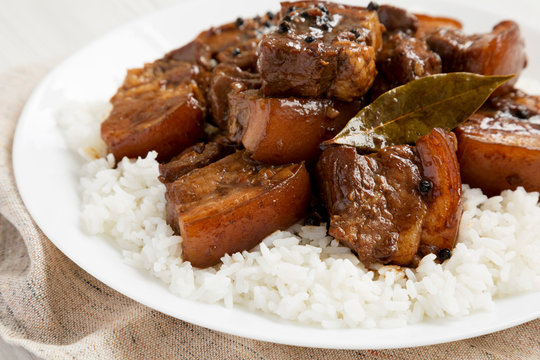

In [ ]:
import PIL.Image

img = PIL.Image.open("demo1.jpg")
img

In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

In [11]:
response = model.generate_content(img)

to_markdown(response.text)

>  **Ingredients:**
> 
> * 1 pound pork belly, cut into 1-inch cubes
> * 1 tablespoon vegetable oil
> * 1/2 cup soy sauce
> * 1/4 cup brown sugar
> * 1/4 cup white vinegar
> * 1 teaspoon garlic powder
> * 1 teaspoon onion powder
> * 1/2 teaspoon ground black pepper
> * 1/4 teaspoon ground cumin
> * 1/4 teaspoon ground coriander
> * 1 bay leaf
> * 1 cup water
> * 1 tablespoon cornstarch
> * 2 tablespoons cold water
> * Steamed rice, for serving
> 
> **Instructions:**
> 
> 1. In a large skillet over medium heat, heat the oil. Add the pork belly and cook until browned on all sides.
> 2. Add the soy sauce, brown sugar, vinegar, garlic powder, onion powder, black pepper, cumin, coriander, and bay leaf to the skillet. Bring to a boil, then reduce heat to low and simmer for 1 hour, or until the pork is tender.
> 3. In a small bowl, whisk together the cornstarch and cold water until smooth. Add to the skillet and cook, stirring constantly, until the sauce has thickened.
> 4. Serve the pork belly adobo over steamed rice.

In [12]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [13]:
to_markdown(response.text)

>  **Adobo Pork Belly**
> 
> This is my favorite Filipino dish! It is a delicious and savory dish made with pork belly, bay leaves, black peppercorns, garlic, soy sauce, and vinegar. The pork belly is braised in the sauce until it is tender and flavorful. The dish is typically served with rice.
> 
> I started meal prepping a few months ago as a way to save time and money. I was spending a lot of money eating out, and I was also finding it difficult to find healthy options. Meal prepping has helped me to eat healthier and save money. I typically cook a large batch of food on the weekend, and then I portion it out into individual containers for the week. This makes it easy for me to grab a healthy meal on the go.
> 
> I'm so glad I started meal prepping! It has made my life so much easier and healthier. If you're looking for a way to save time and money, I encourage you to give meal prepping a try.

# Gemini API Chat Feature

In [17]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
    ),
    history=[]
)

In [18]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> Computers use electricity to quickly do many things at once, like show you pictures, play games, and help you learn.

In [19]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "Computers use electricity to quickly do many things at once, like show you pictures, play games, and help you learn."
 }
 role: "model"]

In [20]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

Computers are electronic devices that can be programmed to carry out a set of instructions.
________________________________________________________________________________
 They consist of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes
________________________________________________________________________________
 the central processing unit (CPU), which is the "brain" of the computer and controls all of its operations, as well as memory, storage devices, input devices (such as keyboards and mice), and output devices (such as monitors and printers). The software includes the operating system, which manages the computer's resources
________________________________________________________________________________
 and provides a way for users to interact with the computer, as well as application software, which allows users to perform specific tasks such as word processing, w

In [21]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: Computers use electricity to quickly do many things at once, like show you pictures, play games, and help you learn.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Computers are electronic devices that can be programmed to carry out a set of instructions. They consist of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the "brain" of the computer and controls all of its operations, as well as memory, storage devices, input devices (such as keyboards and mice), and output devices (such as monitors and printers). The software includes the operating system, which manages the computer's resources and provides a way for users to interact with the computer, as well as application software, which allows users to perform specific tasks such as word processing, web browsing, and playing games.
> 
> In short, computers work by executing instructions provided by software, which allows them to perform a wide range of tasks.

In [22]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [23]:
model.count_tokens(chat.history)

total_tokens: 229